### Helper functions for plotting the results of the test set

In [ ]:
# Flush mounted drive to colab
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# Mount Google drive to colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Path pointing to
!pwd

In [16]:
# cd to yolov5 folder
%cd /content/drive/MyDrive/SeaOtterDrone2021/yolov5-master

/content/drive/.shortcut-targets-by-id/1Q7KLM-4oMZuqbMmlnedIE--3AZB4flUQ/SeaOtterDrone2021/yolov5-master


In [ ]:
!python val.py --weights runs/train/exp16/weights/best.pt --img 1024 --data otters_1.yaml

In [ ]:
!python detect.py --weights runs/train/exp16/weights/best.pt --img 1024 --source ../sea_otter_dataset/dataset_otters/images/validation/

In [31]:
from IPython.display import Image, display
import glob
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches, text, patheffects

In [47]:
def plot_sample_image(img_path, lab_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  fig, ax = plt.subplots()
  #ax.xaxis.tick_top()
  ax.imshow(img)
  plt.axis('off')

  f = open(lab_path, 'r')
  for line in f:
    line = line.rstrip()
    data = line.split(' ')
    box = list(map(float,data[1:]))
    x = (box[0]-box[2]*0.5)*img.shape[1]
    y = (box[1]-box[3]*0.5)*img.shape[0]
    w = box[2] * img.shape[1]
    h = box[3] * img.shape[0]

    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='green', lw=1))
  fn = img_path.split('/')[-1].split('.')[0]
  plt.savefig('example_' + fn + '.png',dpi=600)
  plt.show()

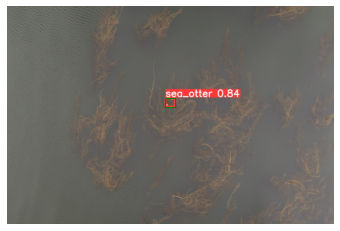

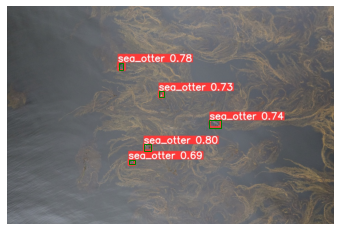

In [48]:
img1 = "/content/drive/MyDrive/SeaOtterDrone2021/yolov5-master/runs/detect/exp11/080921_1102_OCLF_LP_0840.jpeg"
img2 = "/content/drive/MyDrive/SeaOtterDrone2021/yolov5-master/runs/detect/exp11/050821_0813_OCHF_OP_0665.jpeg"

lab1 = "/content/drive/MyDrive/SeaOtterDrone2021/sea_otter_dataset/dataset_otters/labels/validation/080921_1102_OCLF_LP_0840.txt"
lab2 = "/content/drive/MyDrive/SeaOtterDrone2021/sea_otter_dataset/dataset_otters/labels/validation/050821_0813_OCHF_OP_0665.txt"

plot_sample_image(img1, lab1)
plot_sample_image(img2, lab2)